<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/Antonio_Demarchi_DR3_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregue o dataset disponível em https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv para um dataframe para um dataframe utilizando linguagem Python e execute as seguintes transformações:
-Elimine as variáveis `'PassengerId'`,`'Name'`,`'Ticket'` e `'Cabin'`.
-Elimine observações que contenham dados ausentes (NA).
-Aplique o LabelEncoder nas variáveis `'Embarked'` e `'Sex'`.
-Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.
-A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear.
primeiras linhas=
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Flo

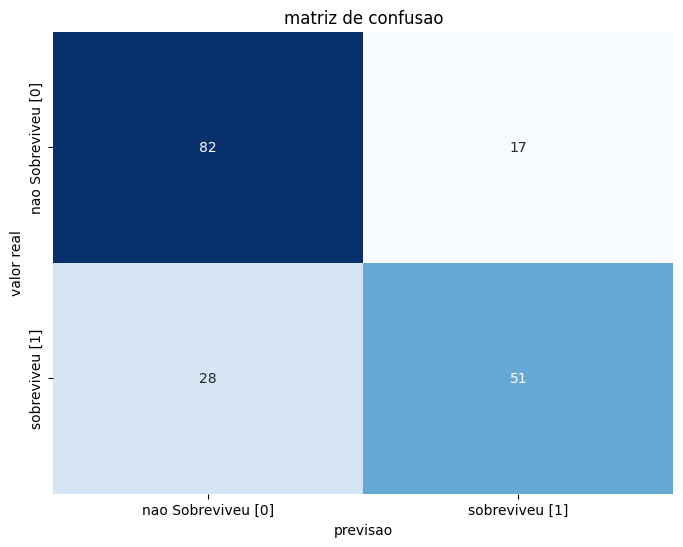

In [14]:
print("1)Carregue o dataset disponível em https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv para um dataframe para um dataframe utilizando linguagem Python e execute as seguintes transformações:")
print("-Elimine as variáveis `'PassengerId'`,`'Name'`,`'Ticket'` e `'Cabin'`.")
print("-Elimine observações que contenham dados ausentes (NA).")
print("-Aplique o LabelEncoder nas variáveis `'Embarked'` e `'Sex'`.")
print("-Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.")
print("-A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear.")

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#link do dataset
url = 'https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv'

#carregar o dataset em um dataframe do pandas
df = pd.read_csv(url)

#exibindo o começo
print("primeiras linhas=")
print(df.head())
print("===========================================================")

#informações [tipos de dados e valores nulos]
print("dados do dataframe=")
df.info()
print("===========================================================")

#exibindo estatisticas descritivas
print("estatisticas descritivas=")
print(df.describe())
print("===========================================================")

#valores nulos p/ coluna
print("contagem de valores nulos por coluna=")
print(df.isnull().sum())
print("===========================================================")

#exibindo a forma do dataset [linhas, colunas]
print("forma do dataset [linhas, colunas]=")
print(df.shape)
print("===========================================================")

#exemplo de contagem de valores unicos para a coluna 'Survived'
print("contagem de valores unicos para a coluna 'Survived'=")
print(df['Survived'].value_counts())

#eliminar as variaveis PassengerId, Name, Ticket e Cabin
df_clean = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#eliminar as observacoes que contenham dados ausentes (NA)
df_clean = df_clean.dropna()

print("forma do dataset apos a limpeza=", df_clean.shape)
print("contagem de valores nulos apos a limpeza=")
print(df_clean.isnull().sum())

#instanciar o labelencoder
le = LabelEncoder()

#aplicar o labelencoder nas colunas Sex e Embarked
df_clean['Sex_encoded'] = le.fit_transform(df_clean['Sex'])
df_clean['Embarked_encoded'] = le.fit_transform(df_clean['Embarked'])

#remover as colunas originais
df_final = df_clean.drop(['Sex', 'Embarked'], axis=1)

print("primeiras 5 linhas do dataset apos a codificacao=")
print(df_final.head())



#definir as variaveis preditoras [X] e a variavel alvo [y]
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

#separar os dados em 75% treino e 25% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("forma dos conjuntos de dados=")
print(f"treinamento [X_train, y_train]= {X_train.shape}, {y_train.shape}")
print(f"teste [X_test, y_test]= {X_test.shape}, {y_test.shape}")


#instanciar o modelo SVM com kernel linear
svm_model = SVC(kernel='linear', random_state=42)

#treinar o modelo com os dados de treino
svm_model.fit(X_train, y_train)

#fazer previsões nos dados de teste
y_pred = svm_model.predict(X_test)

#avaliar o modelo
print("acuracia do modelo SVM com kernel linear=")
print(accuracy_score(y_test, y_pred))
print("======================================================")

print("matriz de confusao=")
print(confusion_matrix(y_test, y_pred))
print("======================================================")

print("relatorio de classificacao=")
print(classification_report(y_test, y_pred))


#calcular a matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred)

#criar o mapa de calor [heatmap]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['nao Sobreviveu [0]', 'sobreviveu [1]'],
            yticklabels=['nao Sobreviveu [0]', 'sobreviveu [1]'])

plt.title('matriz de confusao')
plt.xlabel('previsao')
plt.ylabel('valor real')
plt.show()



matriz de confusao:
[[82 17]
 [28 51]]


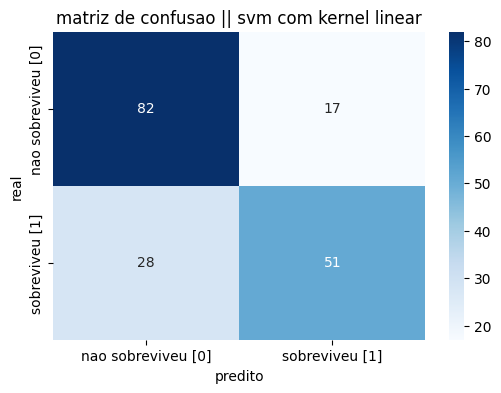

metricas do modelo=
acuracia: 0.7472
relatorio de classificacao=
                    precision    recall  f1-score   support

nao sobreviveu [0]       0.75      0.83      0.78        99
    sobreviveu [1]       0.75      0.65      0.69        79

          accuracy                           0.75       178
         macro avg       0.75      0.74      0.74       178
      weighted avg       0.75      0.75      0.74       178



In [15]:
print("2-Apresente a matriz de confusão resultante do processo de treinamento.")
print("Apresente as métricas acurácia, precision, recall e F1-score deste modelo.")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#instanciar o modelo SVM com kernel linear
svm_model = SVC(kernel='linear', random_state=42)

#treinar o modelo com os dados de treino
svm_model.fit(X_train, y_train)

#fazer previsoes nos dados de teste
y_pred = svm_model.predict(X_test)

#matriz de confusao
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusao:")
print(cm)

print("===========================================================")
#visualizar a matriz de confusao

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['nao sobreviveu [0]', 'sobreviveu [1]'],
            yticklabels=['nao sobreviveu [0]', 'sobreviveu [1]'])
plt.title('matriz de confusao || svm com kernel linear')
plt.xlabel('predito')
plt.ylabel('real')
plt.show()

print("===========================================================")
#metricas= acuracia, precisao, recall e F1-score
print("metricas do modelo=")
print(f"acuracia: {accuracy_score(y_test, y_pred):.4f}")
print("relatorio de classificacao=")
print(classification_report(y_test, y_pred, target_names=['nao sobreviveu [0]', 'sobreviveu [1]']))

avaliacao do modelo SVM com kernel RBF
matriz de confusao [RBF]:
[[83 16]
 [49 30]]


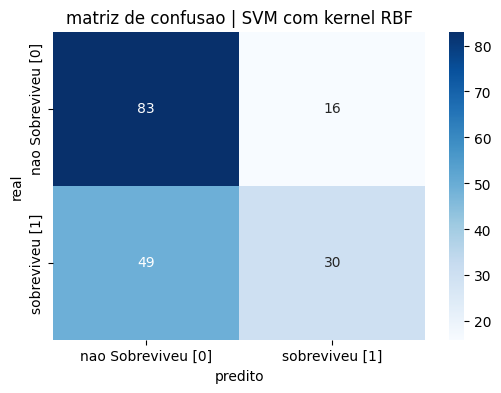

metricas do modelo [RBF]=
acuracia: 0.6348
relatorio de classificação [RBF]=
                    precision    recall  f1-score   support

nao sobreviveu [0]       0.63      0.84      0.72        99
    sobreviveu [1]       0.65      0.38      0.48        79

          accuracy                           0.63       178
         macro avg       0.64      0.61      0.60       178
      weighted avg       0.64      0.63      0.61       178

avaliacao do modelo SVM com kernel sigmoid
=======================================================(====
matriz de confusao [Sigmoid]=
[[61 38]
 [48 31]]


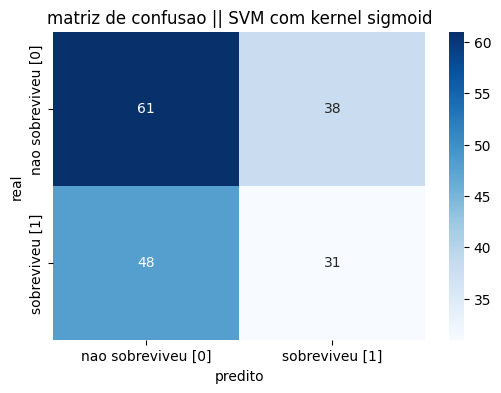

metricas do modelo [Sigmoid]=
Acurácia: 0.5169
Relatório de Classificação [Sigmoid]:
                    precision    recall  f1-score   support

Não Sobreviveu [0]       0.56      0.62      0.59        99
    Sobreviveu [1]       0.45      0.39      0.42        79

          accuracy                           0.52       178
         macro avg       0.50      0.50      0.50       178
      weighted avg       0.51      0.52      0.51       178



In [16]:
print("3-Execute o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.")
print("Apresente a matriz de confusão resultante do processo de treinamento.")
print("Apresente as métricas acurácia, precision, recall e F1-score deste modelo.")

#modelo com kernel RBF
print("avaliacao do modelo SVM com kernel RBF")
#instanciar o modelo SVM com kernel rbf
svm_rbf = SVC(kernel='rbf', random_state=42)
#treinar o modelo
svm_rbf.fit(X_train, y_train)
#fazer previsoes
y_pred_rbf = svm_rbf.predict(X_test)

#matriz de confusao
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("matriz de confusao [RBF]:")
print(cm_rbf)

print("===========================================================")
#visualizacao da matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['nao Sobreviveu [0]', 'sobreviveu [1]'],
            yticklabels=['nao Sobreviveu [0]', 'sobreviveu [1]'])
plt.title('matriz de confusao | SVM com kernel RBF')
plt.xlabel('predito')
plt.ylabel('real')
plt.show()

#metricas de avaliacao
print("metricas do modelo [RBF]=")
print(f"acuracia: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("relatorio de classificação [RBF]=")
print(classification_report(y_test, y_pred_rbf, target_names=['nao sobreviveu [0]', 'sobreviveu [1]']))

print("===========================================================")
#modelo com kernel sigmoid
print("avaliacao do modelo SVM com kernel sigmoid")
#instanciar o modelo SVM com kernel sigmoid
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
#treinar o modelo
svm_sigmoid.fit(X_train, y_train)
#fazer previsoes
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("=======================================================(====")
#matriz de confusao)
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
print("matriz de confusao [Sigmoid]=")
print(cm_sigmoid)

#visualizacao da matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues',
            xticklabels=['nao sobreviveu [0]', 'sobreviveu [1]'],
            yticklabels=['nao sobreviveu [0]', 'sobreviveu [1]'])
plt.title('matriz de confusao || SVM com kernel sigmoid')
plt.xlabel('predito')
plt.ylabel('real')
plt.show()

print("===========================================================")
#metricas de avaliacao
print("metricas do modelo [Sigmoid]=")
print(f"Acurácia: {accuracy_score(y_test, y_pred_sigmoid):.4f}")
print("Relatório de Classificação [Sigmoid]:")
print(classification_report(y_test, y_pred_sigmoid, target_names=['Não Sobreviveu [0]', 'Sobreviveu [1]']))



In [ ]:
print("4-Compare as três execuções (kernel linear, rbf e sigmoid), apresente um resumo dos resultados relevantes e indique qual o melhor, a partir do experimento.")

print("Resposta completa no PDF ")
print("O modelo com o kernel Linear foi o melhor sendo mais recomendado para a tarefa, porque foi o mais preciso e equilibrado entre os três. Isso sugere que a forma como os dados se comportam é mais reta ou linear, e os modelos mais complexos (RBF e Sigmoid) não ajudaram muito nesse caso.")